<a href="https://colab.research.google.com/github/joaoflauzino/cafe_c_codigo_01/blob/main/cafe_c_codigo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyspark

     |████████████████████████████████| 212.3MB 64kB/s 
     |████████████████████████████████| 204kB 14.9MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=870531ebea83befe57418b84c645dbee0c60aef390643f7de2794060f04fa5d4
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


# Bibliotecas

In [56]:
from google.colab import drive
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


# Criando sessão no spark

In [5]:
## Criando sessão
spark = SparkSession.builder.appName("NBO").getOrCreate()

# Leitura de dados

In [6]:
## Leitura de csv 
df = spark.read.csv('/content/drive/My Drive/Datasets/marketing_campaign.csv', sep = ";", header=True)

# Informações sobre a base de dados

- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 - otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

# Perguntas sobre o negócio

- Daqueles que são propensos a aceitar o produto, qual o nível de graduação mais presente? O nível de graduação difere daqueles que aceitam ou não uma oferta?

- Daqueles que são propensos a aceitar o produto, qual o Estado Civil mais presente? O Estado Civil difere daqueles que aceitam ou não uma oferta?

- Quanto mais recente, maior a chance dele aceitar a oferta?

- Quanto maior a renda, maior a chance dele aceitar a oferta?

- Existe alguma correlação entre renda e recência?

- Pessoas mais velhas tendem a aceitar/recusar as ofertas? (criar campo com idade em anos)

- A plataforma que o produto é oferecido impacta na aceitação das ofertas?

- O número de crianças impacta na aceitação de ofertas?

- O número de adolescentes impacta na aceitação de ofertas?
- As campanhas são cumulativas ou independentes? Se for cumulativas, esses clientes reclamaram alguma vez nos últimos 2 anos?

- Clientes mais antigos tendem a aceitar as ofertas? (criar campo com idade em anos)

- Visitas no site da empresa tem correlação com a aceita/recusa das ofertas?

- O número de compras realizada com desconto tem correlação com a aceita/recusa das ofertas?

- A quantia gasta em produtos do tipo GOLD nos últimos 2 anos tem correlação em aceitar/recusar as ofertas?

- Os clientes estão propensos de aceitar as ofertas em qual nível da campanha (1ª a 5ª)?

- Nossas variaveis possuem distribuicao normal?

- Existem outliers no nosso conjunto de dados?


In [7]:
df.show(1, vertical = True)

-RECORD 0-------------------------
 ID                  | 5524       
 Year_Birth          | 1957       
 Education           | Graduation 
 Marital_Status      | Single     
 Income              | 58138      
 Kidhome             | 0          
 Teenhome            | 0          
 Dt_Customer         | 2012-09-04 
 Recency             | 58         
 MntWines            | 635        
 MntFruits           | 88         
 MntMeatProducts     | 546        
 MntFishProducts     | 172        
 MntSweetProducts    | 88         
 MntGoldProds        | 88         
 NumDealsPurchases   | 3          
 NumWebPurchases     | 8          
 NumCatalogPurchases | 10         
 NumStorePurchases   | 4          
 NumWebVisitsMonth   | 7          
 AcceptedCmp3        | 0          
 AcceptedCmp4        | 0          
 AcceptedCmp5        | 0          
 AcceptedCmp1        | 0          
 AcceptedCmp2        | 0          
 Complain            | 0          
 Z_CostContact       | 3          
 Z_Revenue          

# Tratamento da base

In [9]:
df.count()

2240

# Verificar valores nulos

In [8]:
df.select(*(F.sum(F.col(c).isNull().cast("int")).alias(c) for c in df.columns)).show(vertical = True)

-RECORD 0------------------
 ID                  | 0   
 Year_Birth          | 0   
 Education           | 0   
 Marital_Status      | 0   
 Income              | 24  
 Kidhome             | 0   
 Teenhome            | 0   
 Dt_Customer         | 0   
 Recency             | 0   
 MntWines            | 0   
 MntFruits           | 0   
 MntMeatProducts     | 0   
 MntFishProducts     | 0   
 MntSweetProducts    | 0   
 MntGoldProds        | 0   
 NumDealsPurchases   | 0   
 NumWebPurchases     | 0   
 NumCatalogPurchases | 0   
 NumStorePurchases   | 0   
 NumWebVisitsMonth   | 0   
 AcceptedCmp3        | 0   
 AcceptedCmp4        | 0   
 AcceptedCmp5        | 0   
 AcceptedCmp1        | 0   
 AcceptedCmp2        | 0   
 Complain            | 0   
 Z_CostContact       | 0   
 Z_Revenue           | 0   
 Response            | 0   



- Como são apenas 24 registros e existe um desvio padrão bastante significativo, a abordagem escolhida será excluir esses registros do dataset.

In [11]:
df.select('Income').summary().show(vertical = True)

-RECORD 0---------------------
 summary | count              
 Income  | 2216               
-RECORD 1---------------------
 summary | mean               
 Income  | 52247.25135379061  
-RECORD 2---------------------
 summary | stddev             
 Income  | 25173.076660901414 
-RECORD 3---------------------
 summary | min                
 Income  | 101970             
-RECORD 4---------------------
 summary | 25%                
 Income  | 35246.0            
-RECORD 5---------------------
 summary | 50%                
 Income  | 51373.0            
-RECORD 6---------------------
 summary | 75%                
 Income  | 68487.0            
-RECORD 7---------------------
 summary | max                
 Income  | 98777              



In [14]:
df = df.na.drop()

In [15]:
df.count()

2216

# Análise Exploratória

1. Daqueles que são propensos a aceitar o produto, qual o nível de graduação mais presente? O nível de graduação difere daqueles que aceitam ou não uma oferta?

In [19]:
df.select('AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response').groupBy('Response').count().show()

+--------+-----+
|Response|count|
+--------+-----+
|       0| 1883|
|       1|  333|
+--------+-----+



In [23]:
df.filter( (df.AcceptedCmp1 == 0)  &  (df.AcceptedCmp2 == 0) & (df.AcceptedCmp3 == 0) & (df.AcceptedCmp4 == 0) & (df.AcceptedCmp5 == 0) & (df.Response == 1) ).count()

146

* Vamos criar nossa própria target, já que não estamos vendo muito sentido na coluna Response

In [25]:
df = df.withColumn('Target', 
                        F.when(
                            (df.AcceptedCmp1 > 0) | (df.AcceptedCmp2 > 0) | (df.AcceptedCmp3 > 0) | (df.AcceptedCmp4 > 0) | (df.AcceptedCmp5 > 0) , 1
                        ).otherwise(0)
                   )

In [29]:
df.filter(df.Target == 1).select('AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Target').show()

+------------+------------+------------+------------+------------+------+
|AcceptedCmp1|AcceptedCmp2|AcceptedCmp3|AcceptedCmp4|AcceptedCmp5|Target|
+------------+------------+------------+------------+------------+------+
|           0|           0|           1|           0|           0|     1|
|           1|           0|           0|           0|           1|     1|
|           1|           0|           0|           0|           0|     1|
|           0|           0|           0|           1|           0|     1|
|           0|           0|           0|           0|           1|     1|
|           0|           0|           0|           1|           0|     1|
|           0|           0|           1|           0|           0|     1|
|           1|           0|           1|           0|           0|     1|
|           0|           0|           0|           0|           1|     1|
|           0|           0|           0|           1|           1|     1|
|           1|           0|           

In [30]:
df.groupBy('Target').count().show()

+------+-----+
|Target|count|
+------+-----+
|     1|  459|
|     0| 1757|
+------+-----+



In [43]:
df_1_hipotese = df.groupBy('Education', 'Target').count().toPandas()

In [44]:
df_1_hipotese.head()

,Education,Target,count
0,Basic,1,6
1,2n Cycle,0,163
2,Master,0,291
3,Graduation,1,228
4,Basic,0,48


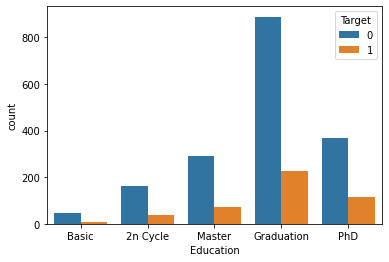

In [45]:
plt.figure()

sns.barplot(data = df_1_hipotese, x = 'Education', y = 'count', hue = 'Target')

- A priori, não existe nenhuma divergência significativa (variável Education) na proporção daqueles que aceitaram ou recusaram uma oferta


2. Daqueles que são propensos a aceitar o produto, qual o Estado Civil mais presente? O Estado Civil difere daqueles que aceitam ou não uma oferta?

In [46]:
df_2_hipotese = df.groupBy('Marital_Status', 'Target').count().toPandas()

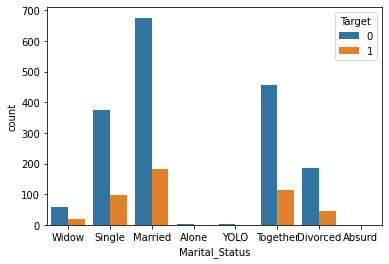

In [48]:
sns.barplot(data = df_2_hipotese, x = 'Marital_Status', y = 'count', hue = 'Target')

- O Estado Civil também aparenta não conter uma diferença significativa para distinguir quem aceita ou recusa uma oferta

3. Quanto mais recente, maior a chance dele aceitar a oferta?

In [62]:
df = df.withColumn('Age_Company', 
        F.floor(
             F.datediff(F.current_date(), F.to_date(F.col('Dt_Customer'), 'yyyy-mm-dd')))
              )

In [69]:
df.select( F.max(F.col('Dt_Customer')), F.min(F.col('Dt_Customer')) ).show()

+----------------+----------------+
|max(Dt_Customer)|min(Dt_Customer)|
+----------------+----------------+
|      2014-06-29|      2012-07-30|
+----------------+----------------+



In [72]:
df.agg({"Age_Company": "max"}).show()

+----------------+
|max(Age_Company)|
+----------------+
|            3421|
+----------------+



In [71]:
df.agg({"Age_Company": "min"}).show()

+----------------+
|min(Age_Company)|
+----------------+
|            2660|
+----------------+



In [63]:
df_age_company = df.select('Target', 'Age_Company').toPandas()

# Modelagem

# Avaliação do modelo